In [1]:
# train slant model on press releases using media bi- and trigrams

## import
import os
import numpy as np
import pandas as pd
import pickle
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LogisticRegression
import re
import joblib

## set wd
os.chdir("/home/nico/Documents/Projects/_rrpviol_med/")

In [2]:
## load press releases
pprs = pd.read_csv('_dt/_releases/germanyPPRs.csv')
pprs.text = [str(t) for t in pprs.text]

In [7]:
## restrict to relevant time frame
pprs = pprs[pprs.year > 2013]

In [8]:
## load vectorizer
vec = pickle.load(open('_dt/bitrigram_vectorizer.pkl', mode='rb'))

In [9]:
## preprocess and vectorize
DocTokenizer = RegexpTokenizer(r'\w+')
Tokenizer = lambda x : DocTokenizer.tokenize(x)
pprs['tokens'] = [' '.join(t) for t in pprs.text.apply(Tokenizer)]

In [10]:
## define outcome
pprs['label'] = 0
pprs.loc[[re.match('.*afd.*', p) != None for p in pprs.party], 'label'] = 1

In [11]:
## vectorize
mtrx = vec.transform(pprs.tokens)

In [12]:
## fit model
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(mtrx, pprs.label)

LogisticRegression(max_iter=1000)

In [13]:
## save model
joblib.dump(logreg, '_dt/bitrigram_classifier.pkl')

['_dt/bitrigram_classifier.pkl']

In [14]:
import eli5

In [15]:
eli5.show_weights(logreg, feature_names = vec.get_feature_names())

Weight?,Feature
+5.364,alexander gauland
+5.035,alternative deutschland
+2.457,auswärtigen ausschusses
+2.412,illegale migranten
+2.411,illegale einwanderer
+2.149,offene grenzen
+2.098,wies darauf
+2.069,abgelehnte asylbewerber
+2.034,offenen grenzen
+1.948,illegale einwanderung


In [16]:
import matplotlib as plt
import seaborn as sns

def FeaturePlot(clf, vectorizer):

    feature_names = vectorizer.get_feature_names()
    
    top30_index = np.argsort(clf.coef_[0])[-30:]
        
    top30_coefs = pd.Series([clf.coef_[0][j] for j in top30_index])
    top30_features = pd.Series([feature_names[j] for j in top30_index])
    top30 = pd.concat([top30_coefs, top30_features], axis = 1)
    
    # plot
    sns.set(rc={'figure.figsize':(10,10)})
    plot = sns.barplot(data=top30, x=0, y=1, alpha=.8)
    plot.set(xlim=(0,None))

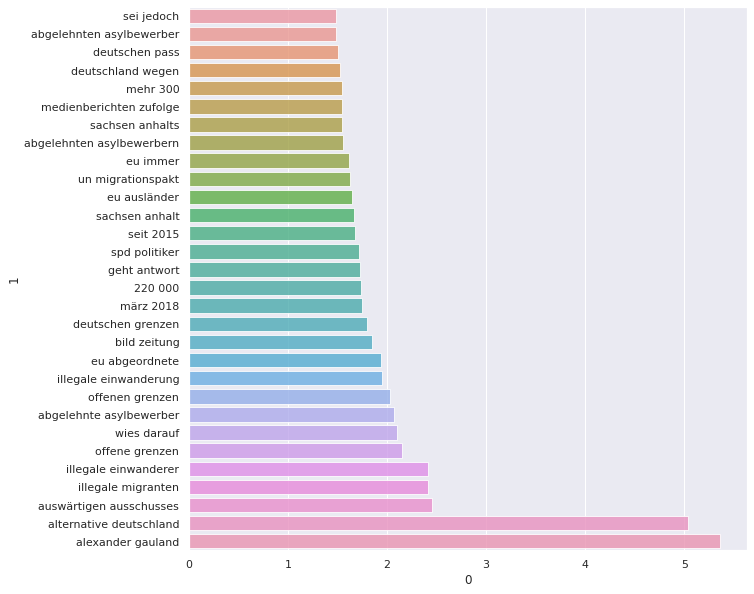

In [17]:
FeaturePlot(logreg, vec)